In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv(r"C:\Users\dogan\OneDrive\Desktop\vehicles_dataset.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   object 
 1   description     946 non-null    object 
 2   make            1002 non-null   object 
 3   model           1002 non-null   object 
 4   type            1002 non-null   object 
 5   year            1002 non-null   int64  
 6   price           979 non-null    float64
 7   engine          1000 non-null   object 
 8   cylinders       897 non-null    float64
 9   fuel            995 non-null    object 
 10  mileage         968 non-null    float64
 11  transmission    1000 non-null   object 
 12  trim            1001 non-null   object 
 13  body            999 non-null    object 
 14  doors           995 non-null    float64
 15  exterior_color  997 non-null    object 
 16  interior_color  964 non-null    object 
 17  drivetrain      1002 non-null   o

In [4]:
df.head()

name  \
0     2024 Jeep Wagoneer Series II   
1  2024 Jeep Grand Cherokee Laredo   
2         2024 GMC Yukon XL Denali   
3       2023 Dodge Durango Pursuit   
4            2024 RAM 3500 Laramie   

                                         description   make           model  \
0  \n      \n        Heated Leather Seats, Nav Sy...   Jeep        Wagoneer   
1  Al West is committed to offering every custome...   Jeep  Grand Cherokee   
2                                                NaN    GMC        Yukon XL   
3  White Knuckle Clearcoat 2023 Dodge Durango Pur...  Dodge         Durango   
4  \n      \n        2024 Ram 3500 Laramie Billet...    RAM            3500   

  type  year    price                                             engine  \
0  New  2024  74600.0                            24V GDI DOHC Twin Turbo   
1  New  2024  50170.0                                                OHV   
2  New  2024  96410.0  6.2L V-8 gasoline direct injection, variable v...   
3  New  2023  46835.0                                       16V MPFI OHV   
4  New  2024  81663.0                           24V DDI OHV Turbo Diesel   

   cylinders      fuel  mileage       transmission       trim          body  \
0        6.0  Gasoline     10.0  8-Speed Automatic  Series II           SUV   
1        6.0  Gasoline      1.0  8-Speed Automatic     Laredo           SUV   
2        8.0  Gasoline      0.0          Automatic     Denali           SUV   
3        8.0  Gasoline     32.0  8-Speed Automatic    Pursuit           SUV   
4        6.0    Diesel     10.0  6-Speed Automatic    Laramie  Pickup Truck   

   doors           exterior_color    interior_color        drivetrain  
0    4.0                    White      Global Black  Four-wheel Drive  
1    4.0                 Metallic      Global Black  Four-wheel Drive  
2    4.0             Summit White  Teak/Light Shale  Four-wheel Drive  
3    4.0  White Knuckle Clearcoat             Black   All-wheel Drive  
4    4.0                   Silver             Black  Four-wheel Drive

In [5]:
df.shape

(1002, 18)

In [6]:
df.count()

name              1002
description        946
make              1002
model             1002
type              1002
year              1002
price              979
engine            1000
cylinders          897
fuel               995
mileage            968
transmission      1000
trim              1001
body               999
doors              995
exterior_color     997
interior_color     964
drivetrain        1002
dtype: int64

In [7]:
df.isnull().sum().any()

True

In [8]:
df["description"].dropna(axis=0, inplace=True)

In [9]:
make_counts = df['make'].value_counts()
print(make_counts)

Jeep             194
Hyundai          121
Dodge            117
Ford              88
RAM               79
Kia               52
Chevrolet         49
Nissan            40
Volkswagen        38
Mazda             38
Mercedes-Benz     30
GMC               23
Honda             22
BMW               19
Audi              16
Acura             12
Chrysler          12
Cadillac          10
Subaru             8
Toyota             8
Buick              8
INFINITI           5
Land Rover         4
Volvo              3
Lincoln            2
Genesis            2
Lexus              1
Jaguar             1
Name: make, dtype: int64


In [10]:
df["description"].isnull().sum()

56

In [11]:
df.isnull().sum()

name                0
description        56
make                0
model               0
type                0
year                0
price              23
engine              2
cylinders         105
fuel                7
mileage            34
transmission        2
trim                1
body                3
doors               7
exterior_color      5
interior_color     38
drivetrain          0
dtype: int64

In [12]:
df['model'].value_counts()

Hornet            65
3500              52
Compass           47
Durango           41
CX-90 PHEV        34
                  ..
SQ8 e-tron         1
Sorento Hybrid     1
Bronco             1
740                1
Forte              1
Name: model, Length: 153, dtype: int64

In [13]:
df["body"].value_counts()

SUV              704
Pickup Truck     154
Sedan             80
Cargo Van         36
Passenger Van     13
Hatchback         10
Convertible        1
Minivan            1
Name: body, dtype: int64

In [14]:
# "body" sütununu sayısal değerlere dönüştürme
df['body_code'] = pd.Categorical(df['body']).codes

# Korelasyon hesaplama
correlation = df['body_code'].corr(df['price'])

print("Korelasyon:", correlation)

Korelasyon: -0.1240414794964371


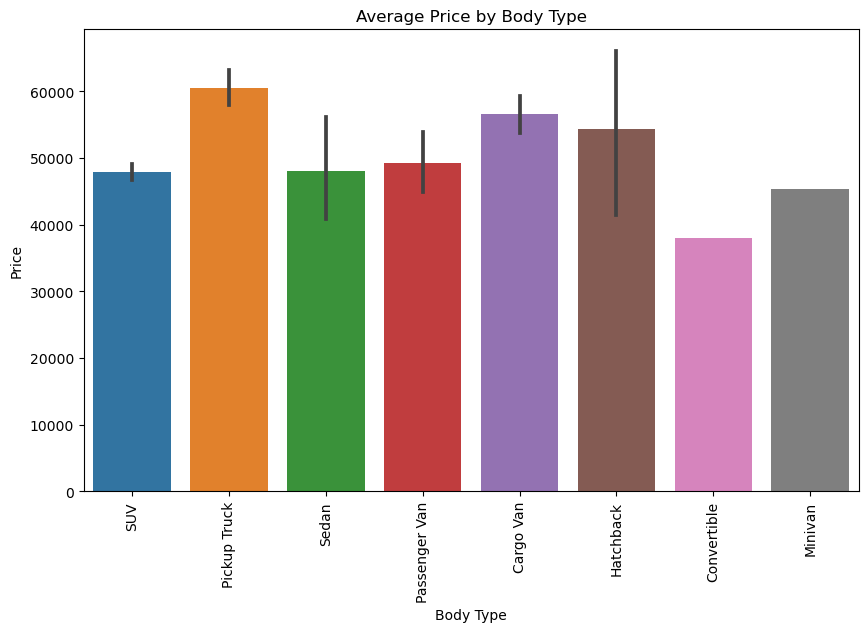

In [15]:
# Bar Plot oluşturma
plt.figure(figsize=(10, 6))
sns.barplot(x='body', y='price', data=df)
plt.xticks(rotation=90)
plt.xlabel('Body Type')
plt.ylabel('Price')
plt.title('Average Price by Body Type')
plt.show()


In [16]:
df['make'].value_counts()

Jeep             194
Hyundai          121
Dodge            117
Ford              88
RAM               79
Kia               52
Chevrolet         49
Nissan            40
Volkswagen        38
Mazda             38
Mercedes-Benz     30
GMC               23
Honda             22
BMW               19
Audi              16
Acura             12
Chrysler          12
Cadillac          10
Subaru             8
Toyota             8
Buick              8
INFINITI           5
Land Rover         4
Volvo              3
Lincoln            2
Genesis            2
Lexus              1
Jaguar             1
Name: make, dtype: int64

In [17]:
def eksik_deger_tablosu(df):
    eksik_deger = df.isnull().sum()
    eksik_deger_yuzde = 100 * df.isnull().sum()/len(df)
    eksik_deger_tablo = pd.concat([eksik_deger, eksik_deger_yuzde], axis=1)
    eksik_deger_tablo_son = eksik_deger_tablo.rename(
    columns = {0 : 'Eksik Değerler', 1 : '% Değeri'})
    return eksik_deger_tablo_son

eksik_deger_tablosu(df)

Eksik Değerler   % Değeri
name                         0   0.000000
description                 56   5.588822
make                         0   0.000000
model                        0   0.000000
type                         0   0.000000
year                         0   0.000000
price                       23   2.295409
engine                       2   0.199601
cylinders                  105  10.479042
fuel                         7   0.698603
mileage                     34   3.393214
transmission                 2   0.199601
trim                         1   0.099800
body                         3   0.299401
doors                        7   0.698603
exterior_color               5   0.499002
interior_color              38   3.792415
drivetrain                   0   0.000000
body_code                    0   0.000000

In [18]:
# Eksik verileri temizleme
df.dropna(subset=['year', 'price', 'cylinders'], inplace=True)

In [19]:
# NaN ve sonsuz değerleri kontrol etme ve temizleme
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

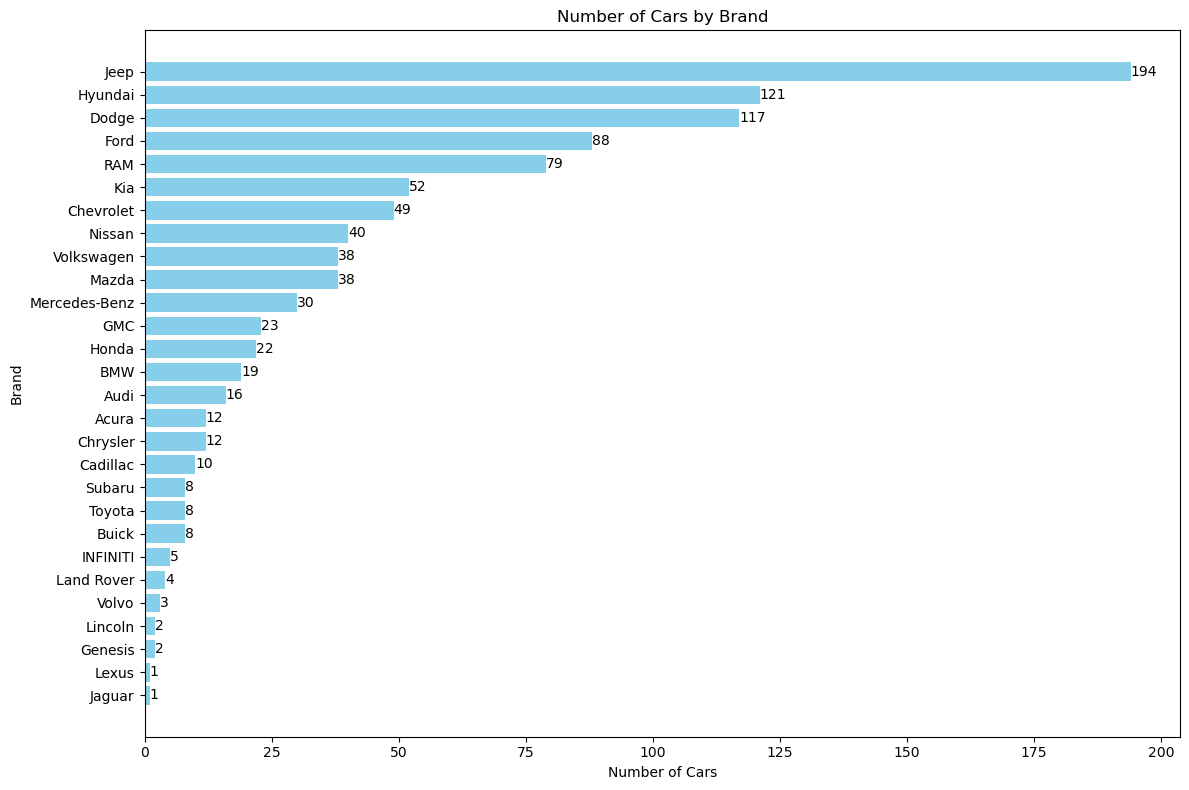

In [20]:
# Verilerle veri çerçevesi oluşturma
data = {
    'make': ['Jeep', 'Hyundai', 'Dodge', 'Ford', 'RAM', 'Kia', 'Chevrolet', 'Nissan', 'Volkswagen', 'Mazda',
             'Mercedes-Benz', 'GMC', 'Honda', 'BMW', 'Audi', 'Acura', 'Chrysler', 'Cadillac', 'Subaru',
             'Toyota', 'Buick', 'INFINITI', 'Land Rover', 'Volvo', 'Lincoln', 'Genesis', 'Lexus', 'Jaguar'],
    'count': [194, 121, 117, 88, 79, 52, 49, 40, 38, 38, 30, 23, 22, 19, 16, 12, 12, 10, 8, 8, 8, 5, 4, 3, 2, 2, 1, 1]
}

df_brand = pd.DataFrame(data)

# Grafiği oluştur
plt.figure(figsize=(12, 8))
bars = plt.barh(df_brand['make'], df_brand['count'], color='skyblue')
plt.xlabel('Number of Cars')
plt.ylabel('Brand')
plt.title('Number of Cars by Brand')
plt.gca().invert_yaxis()  # Ters çevirerek en çoktan en aza doğru sırala

# Çubukların üzerine değerleri yazdır
for bar in bars:
    plt.text(
        bar.get_width(),    # X pozisyonu
        bar.get_y() + bar.get_height() / 2,  # Y pozisyonu
        f'{bar.get_width()}',  # Yazılacak metin
        va='center',  # Dikey hizalama
        ha='left'     # Yatay hizalama
    )

plt.tight_layout()  # Etiketlerin düzgün görünmesi için
plt.show()


In [21]:
pd.set_option('display.max_columns', None)

In [22]:
df.corr()


year     price  cylinders   mileage     doors  body_code
year       1.000000  0.011111  -0.362589 -0.097136  0.055034   0.011811
price      0.011111  1.000000   0.474330  0.100730 -0.106840  -0.215098
cylinders -0.362589  0.474330   1.000000  0.029462 -0.178057  -0.202475
mileage   -0.097136  0.100730   0.029462  1.000000 -0.027425  -0.037198
doors      0.055034 -0.106840  -0.178057 -0.027425  1.000000   0.620794
body_code  0.011811 -0.215098  -0.202475 -0.037198  0.620794   1.000000

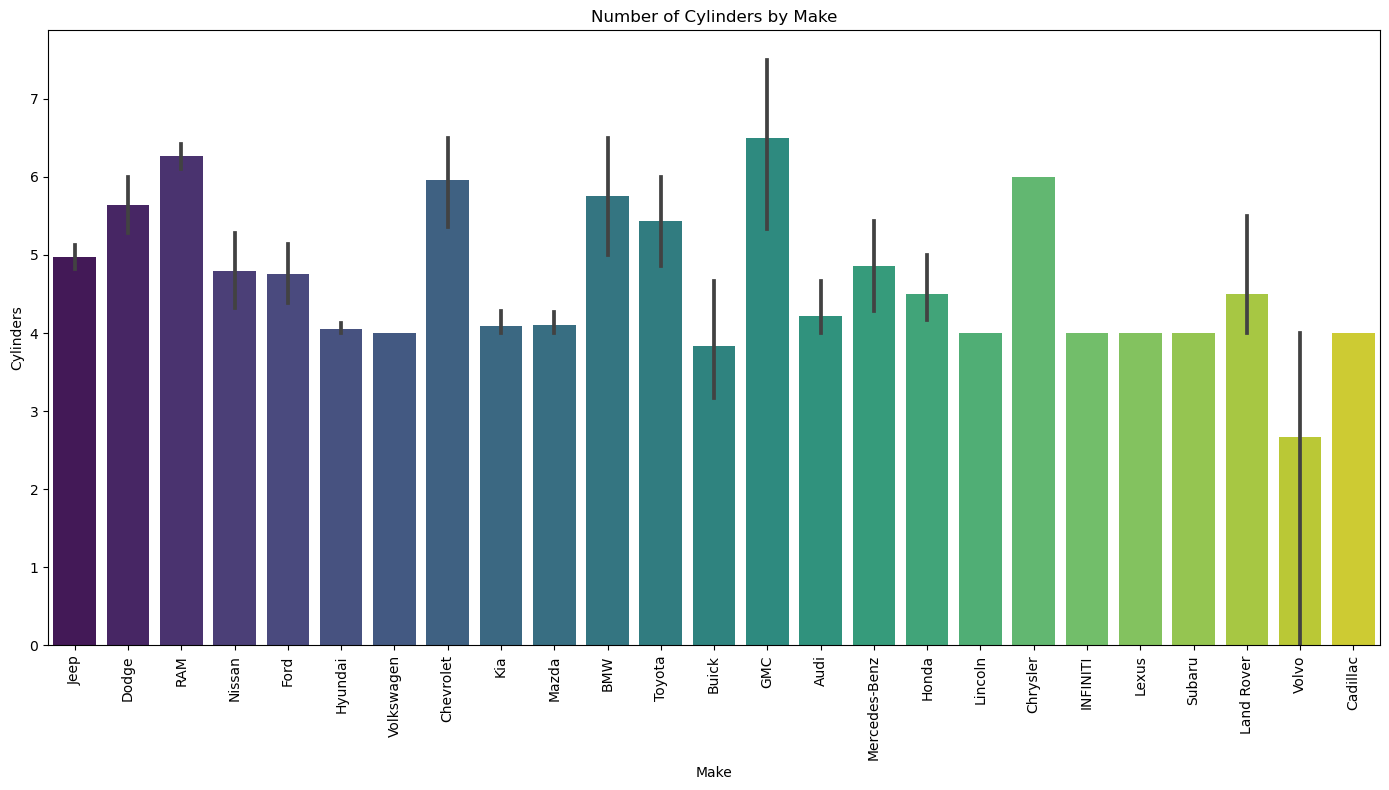

In [23]:
plt.figure(figsize=(14, 8))
sns.barplot(x='make', y='cylinders', data=df, palette='viridis')
plt.xlabel('Make')
plt.ylabel('Cylinders')
plt.title('Number of Cylinders by Make')
plt.xticks(rotation=90)
plt.tight_layout()  # Etiketlerin düzgün görünmesi için
plt.show()

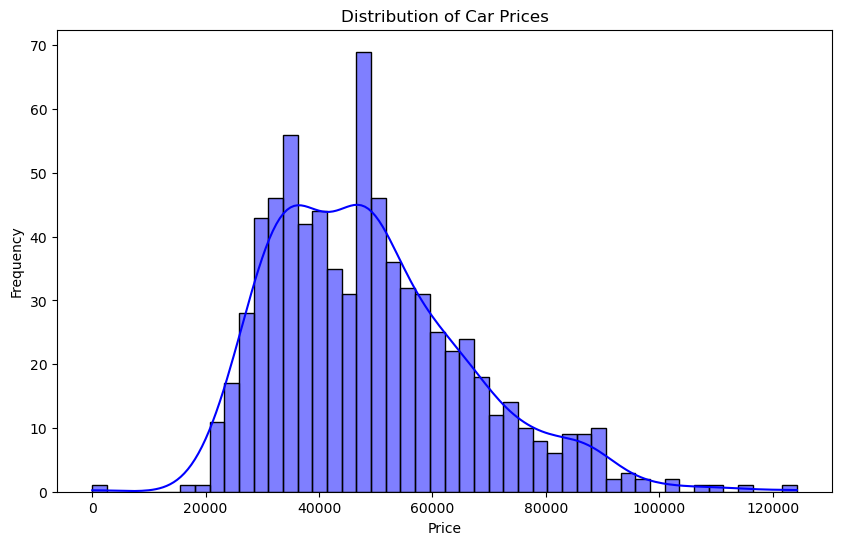

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(df["price"], bins=48, kde=True, color="blue")
plt.title("Distribution of Car Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


In [25]:
# Price sütunundaki uç değerleri bulmak için IQR yöntemini kullan
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Uç değerlerin alt ve üst sınırlarını hesapla
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Uç değerleri belirle
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Uç değerleri veri setinden çıkar
df_cleaned = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Uç değerleri ve temizlenmiş veri setini kontrol et
print("Uç Değerler:\n", outliers)
print("Temizlenmiş Veri Seti:\n", df_cleaned)

# Gerekirse temizlenmiş veri setini kaydet
# df_cleaned.to_csv('cleaned_dataset.csv', index=False)


Uç Değerler:
                                      name  \
94             2024 Audi SQ5 Premium Plus   
405     2024 Mercedes-Benz GLS 450 4MATIC   
450                      2024 BMW X7 M60i   
538                        2024 BMW 740 i   
611   2024 Jeep Grand Wagoneer Series III   
697     2024 Mercedes-Benz GLS 450 4MATIC   
720           2024 GMC Sierra 3500 Denali   
734    2023 Jeep Grand Wagoneer Series II   
769  2024 GMC Sierra 2500 Denali Ultimate   
829   2024 Jeep Grand Wagoneer Series III   
843                 2024 BMW X7 xDrive40i   

                                           description           make  \
94   \n      \n        Ultra Blue Metallic 2024 Aud...           Audi   
405  \n      \n        Pinnacle Trim Package,Catala...  Mercedes-Benz   
450                                   2024 BMW X7 M60i            BMW   
538  With the largest new and Certified Pre-Owned B...            BMW   
611  All prices plus tax, tag, title,dealer fee, de...           Jeep   
697  \n

In [26]:
# Price sütunundaki uç değerleri bulmak için IQR yöntemini kullan
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Uç değerlerin alt ve üst sınırlarını hesapla
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Uç değerleri belirle
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Uç değerleri veri setinden çıkar
df_cleaned = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Sadece çıkarılan uç değerlerin price sütunundaki değerlerini al
outlier_prices = outliers['price'].tolist()

# Uç değerleri ve temizlenmiş veri setini kontrol et
print("Uç Değerler (price):")
print(outliers[['name', 'price']].to_string(index=False))
print("\nTemizlenmiş Veri Seti:")
print(df_cleaned[['name', 'price']].to_string(index=False))

# Uç değerleri ve temizlenmiş veri setini Excel dosyasına aktar
with pd.ExcelWriter('output.xlsx') as writer:
    outliers[['name', 'price']].to_excel(writer, sheet_name='Uç Değerler', index=False)
    df_cleaned[['name', 'price']].to_excel(writer, sheet_name='Temizlenmiş Veri Seti', index=False)

print("Veriler output.xlsx dosyasına başarıyla aktarıldı.")


Uç Değerler (price):
                                name    price
          2024 Audi SQ5 Premium Plus      0.0
   2024 Mercedes-Benz GLS 450 4MATIC  98180.0
                    2024 BMW X7 M60i 115445.0
                      2024 BMW 740 i 103045.0
 2024 Jeep Grand Wagoneer Series III 124250.0
   2024 Mercedes-Benz GLS 450 4MATIC  95230.0
         2024 GMC Sierra 3500 Denali 102287.0
  2023 Jeep Grand Wagoneer Series II 110150.0
2024 GMC Sierra 2500 Denali Ultimate  96860.0
 2024 Jeep Grand Wagoneer Series III 108537.0
               2024 BMW X7 xDrive40i  94895.0

Temizlenmiş Veri Seti:
                                                                    name   price
                                            2024 Jeep Wagoneer Series II 74600.0
                                         2024 Jeep Grand Cherokee Laredo 50170.0
                                              2023 Dodge Durango Pursuit 46835.0
                                                   2024 RAM 3500 Laramie 81663.

PermissionError: [Errno 13] Permission denied: 'output.xlsx'

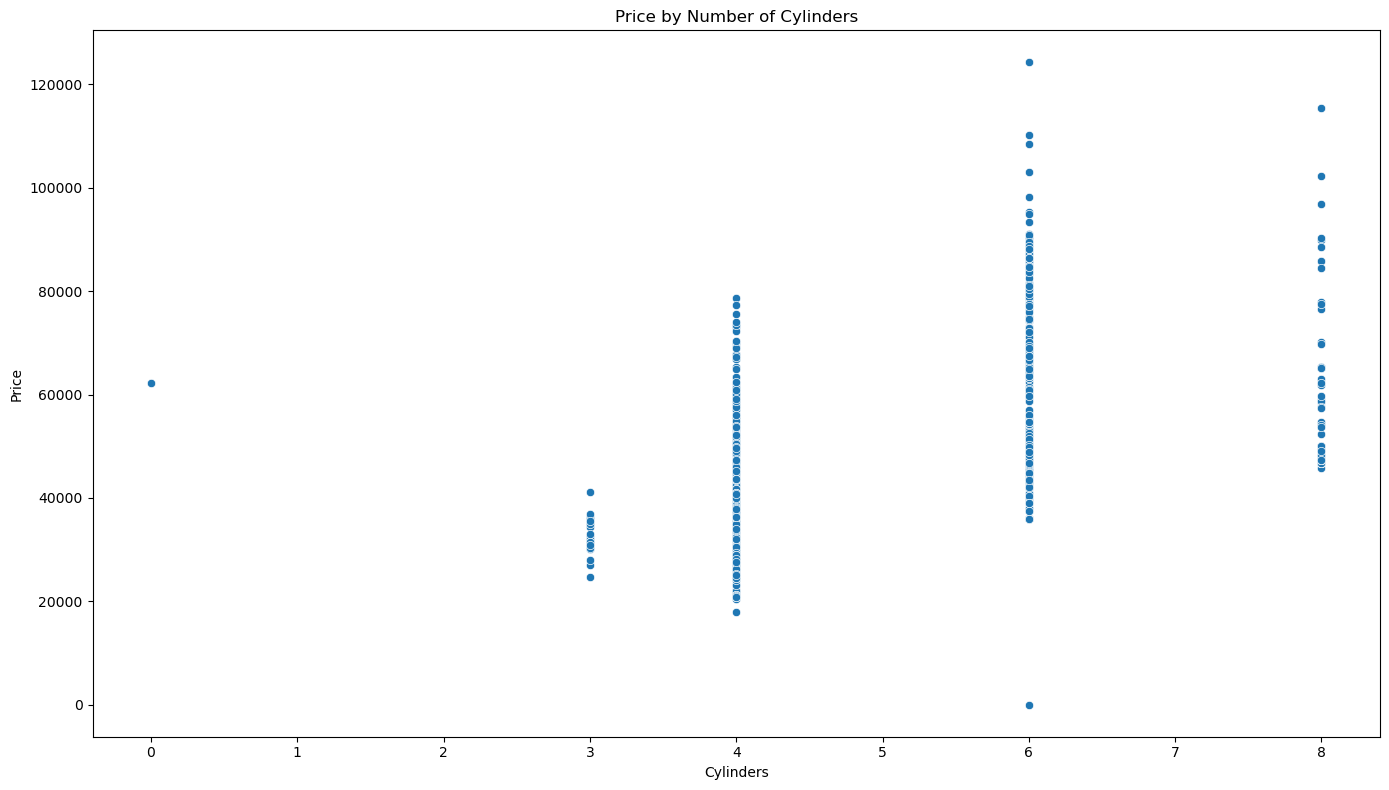

In [27]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x='cylinders', y='price', data=df, palette='viridis')
plt.xlabel('Cylinders')
plt.ylabel('Price')
plt.title('Price by Number of Cylinders')
plt.xticks(rotation=0)
plt.tight_layout()  # Etiketlerin düzgün görünmesi için
plt.show()

In [28]:
df.dropna(how="any", inplace=True)
df.isnull().sum().any()

False

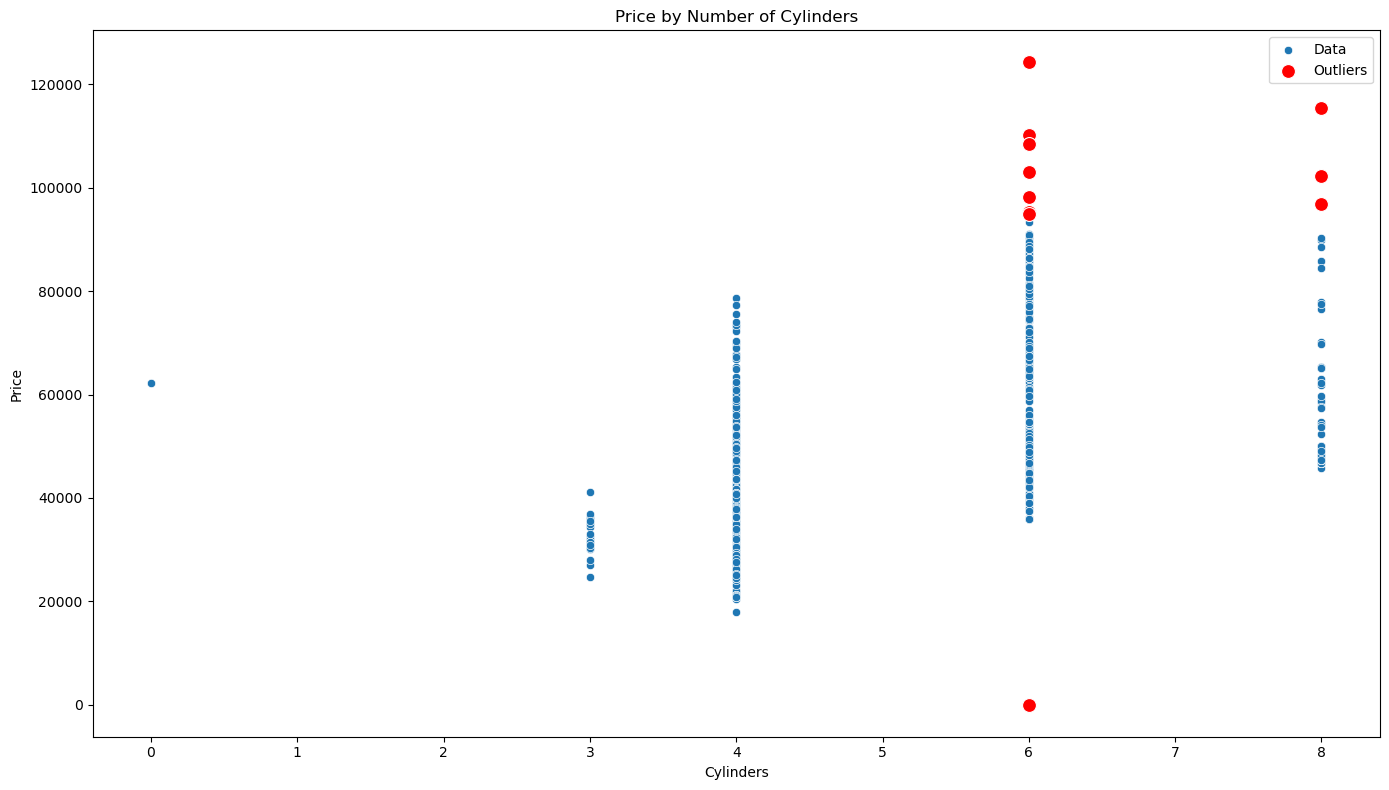

In [29]:
# Fiyat sütunundaki outlier'ları tespit etme
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Outlier'ları belirleme
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Scatter plot ile görselleştirme
plt.figure(figsize=(14, 8))
sns.scatterplot(x='cylinders', y='price', data=df, palette='viridis', label='Data')
sns.scatterplot(x='cylinders', y='price', data=outliers, color='red', label='Outliers', s=100)
plt.xlabel('Cylinders')
plt.ylabel('Price')
plt.title('Price by Number of Cylinders')
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()  # Etiketlerin düzgün görünmesi için
plt.show()

In [30]:
# Outlier'ları yazdırma
print("Outliers:")
for index, row in outliers.iterrows():
    print(f"Index: {index}, Make: {row['make']}, Cylinders: {row['cylinders']}, Price: {row['price']}")

Outliers:
Index: 94, Make: Audi, Cylinders: 6.0, Price: 0.0
Index: 405, Make: Mercedes-Benz, Cylinders: 6.0, Price: 98180.0
Index: 450, Make: BMW, Cylinders: 8.0, Price: 115445.0
Index: 538, Make: BMW, Cylinders: 6.0, Price: 103045.0
Index: 611, Make: Jeep, Cylinders: 6.0, Price: 124250.0
Index: 697, Make: Mercedes-Benz, Cylinders: 6.0, Price: 95230.0
Index: 720, Make: GMC, Cylinders: 8.0, Price: 102287.0
Index: 734, Make: Jeep, Cylinders: 6.0, Price: 110150.0
Index: 769, Make: GMC, Cylinders: 8.0, Price: 96860.0
Index: 829, Make: Jeep, Cylinders: 6.0, Price: 108537.0
Index: 843, Make: BMW, Cylinders: 6.0, Price: 94895.0


In [31]:
ortalama_fiyatlar = df.groupby('cylinders')['price'].mean()

print(ortalama_fiyatlar)

cylinders
0.0    62240.000000
3.0    33086.045455
4.0    41147.233735
6.0    62001.073913
8.0    56486.853659
Name: price, dtype: float64


In [32]:
df.duplicated().value_counts()

False    734
True      16
dtype: int64

In [33]:
df.shape

(750, 19)

In [34]:
df.describe()

year          price   cylinders      mileage       doors  \
count   750.000000     750.000000  750.000000   750.000000  750.000000   
mean   2023.906667   49011.205333    5.016000    80.212000    3.937333   
std       0.304542   17377.814762    1.413178   571.840104    0.287837   
min    2023.000000       0.000000    0.000000     0.000000    2.000000   
25%    2024.000000   35786.500000    4.000000     3.000000    4.000000   
50%    2024.000000   46862.500000    4.000000     8.000000    4.000000   
75%    2024.000000   58895.500000    6.000000    13.750000    4.000000   
max    2025.000000  124250.000000    8.000000  9711.000000    4.000000   

        body_code  
count  750.000000  
mean     5.578667  
std      1.301565  
min      0.000000  
25%      5.000000  
50%      6.000000  
75%      6.000000  
max      7.000000

In [35]:
df.max()

name                           2025 Mazda CX-70 3.3 Turbo S Premium
description       must finance with vci using standard ratesCar ...
make                                                          Volvo
model                                                           XT6
type                                                            New
year                                                           2025
price                                                      124250.0
engine            t 2L I-4 gasoline direct injection, DOHC, vari...
cylinders                                                       8.0
fuel                                               PHEV Hybrid Fuel
mileage                                                      9711.0
transmission                            automatic w/paddle shifters
trim                                                      xDrive40i
body                                                          Sedan
doors                                           

In [36]:
df.min()

name                                    2023 Buick Envision Essence
description       \n      \n         Alloy Wheels / Premium Whee...
make                                                           Audi
model                                                          2500
type                                                            New
year                                                           2023
price                                                           0.0
engine            .6L I-4 gasoline direct injection, DOHC, D-CVV...
cylinders                                                       0.0
fuel                                                         Diesel
mileage                                                         0.0
transmission                                     10-Speed Automatic
trim                                                         1.4T S
body                                                      Cargo Van
doors                                           

In [37]:
df.median()

C:\Users\dogan\AppData\Local\Temp\ipykernel_30848\530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


year          2024.0
price        46862.5
cylinders        4.0
mileage          8.0
doors            4.0
body_code        6.0
dtype: float64

In [38]:
df.std()

C:\Users\dogan\AppData\Local\Temp\ipykernel_30848\3390915376.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


year             0.304542
price        17377.814762
cylinders        1.413178
mileage        571.840104
doors            0.287837
body_code        1.301565
dtype: float64

In [39]:
df.nunique()

name              269
description       596
make               25
model             118
type                1
year                3
price             656
engine             86
cylinders           5
fuel                6
mileage            84
transmission       32
trim              162
body                8
doors               3
exterior_color    221
interior_color     75
drivetrain          4
body_code           8
dtype: int64

In [40]:
pip install altair vega_datasets


Note: you may need to restart the kernel to use updated packages.


In [41]:
import altair as alt

# Araç markalarına göre araç sayısı grafiği
def marka_sayisi_gorsellestir(df):
    make_counts = df['make'].value_counts().reset_index()
    make_counts.columns = ['make', 'count']

    chart = alt.Chart(make_counts).mark_bar().encode(
        y=alt.Y('make', sort='-x', title='Brand'),
        x=alt.X('count', title='Number of Cars'),
        color='count',
        tooltip=['make', 'count']
    ).properties(
        title='Number of Cars by Brand',
        width=600,
        height=400
    )

    return chart

# Silindir sayısına göre fiyat grafiği
def fiyat_gorsellestir(df):
    chart = alt.Chart(df).mark_circle(size=60).encode(
        x=alt.X('cylinders', title='Cylinders'),
        y=alt.Y('price', title='Price'),
        color='cylinders',
        tooltip=['make', 'model', 'price', 'cylinders']
    ).properties(
        title='Price by Number of Cylinders',
        width=600,
        height=400
    ).interactive()

    return chart

# Görselleştirmeleri oluştur ve göster
marka_sayisi_chart = marka_sayisi_gorsellestir(df)
fiyat_chart = fiyat_gorsellestir(df)

# Grafikleri yan yana göstermek için Altair'in `hconcat` fonksiyonunu kullanabilirsiniz
combined_chart = alt.hconcat(marka_sayisi_chart, fiyat_chart)
combined_chart.show()


alt.HConcatChart(...)

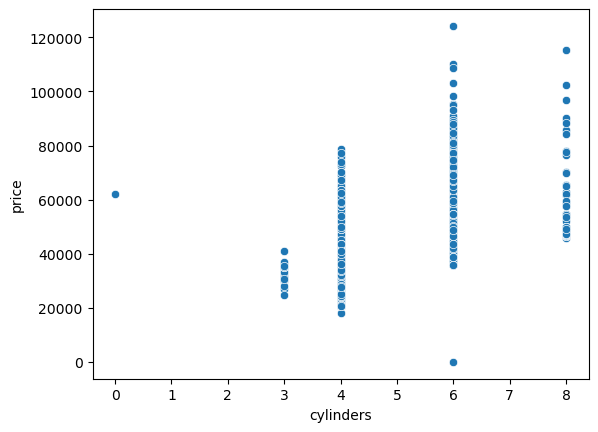

In [42]:
# Scatterplot oluştur
sns.scatterplot(data=df, x="cylinders", y="price")
plt.show()

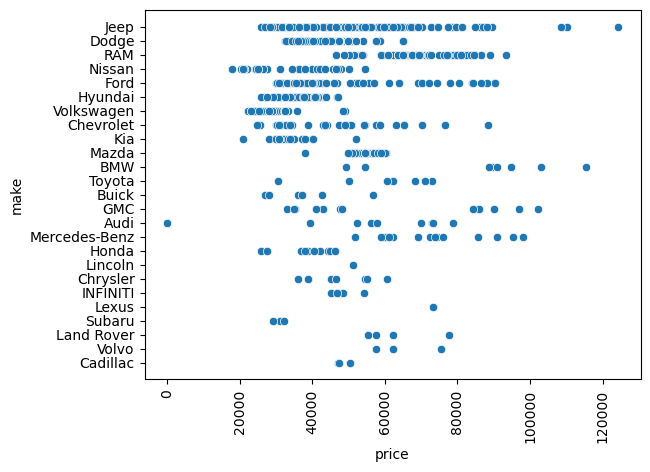

In [43]:
# Scatterplot oluştur
sns.scatterplot(data=df, x="price", y="make")
plt.xticks(rotation=90)
plt.show()

In [44]:
import plotly.express as px

fig = px.scatter(df, x='price', y='make', title='Price vs Make Scatterplot')
fig.update_layout(xaxis_title='Price', yaxis_title='Make')
fig.update_xaxes(tickangle=90)
fig.show()


In [49]:
# Kategorik değişkenleri sayısal değerlere dönüştürme
label_encoders = {}
categorical_columns = ['make', 'model', 'type', 'engine', 'fuel', 'body']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [50]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Özelliklerin ve hedef değişkenin belirlenmesi
X = df[['year', 'cylinders']]
y = df['price']

# Veri setini eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Farklı regresyon modellerini tanımlama
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

# Modelleri eğitme ve değerlendirme
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R^2': r2}

# Sonuçları yazdırma
results_df = pd.DataFrame(results).T
print(results_df)

# En iyi modeli seçme
best_model_name = results_df['R^2'].idxmax()
best_model = models[best_model_name]

print(f"Best model: {best_model_name}")


                            MSE       R^2
Linear Regression  2.434096e+08  0.308123
Ridge              2.436183e+08  0.307529
Lasso              2.434226e+08  0.308086
Decision Tree      2.151055e+08  0.388575
Random Forest      2.151797e+08  0.388364
Best model: Decision Tree


Best XGBoost Model R^2: 0.7485384871251783
Best XGBoost Model MSE: 88466765.93037781


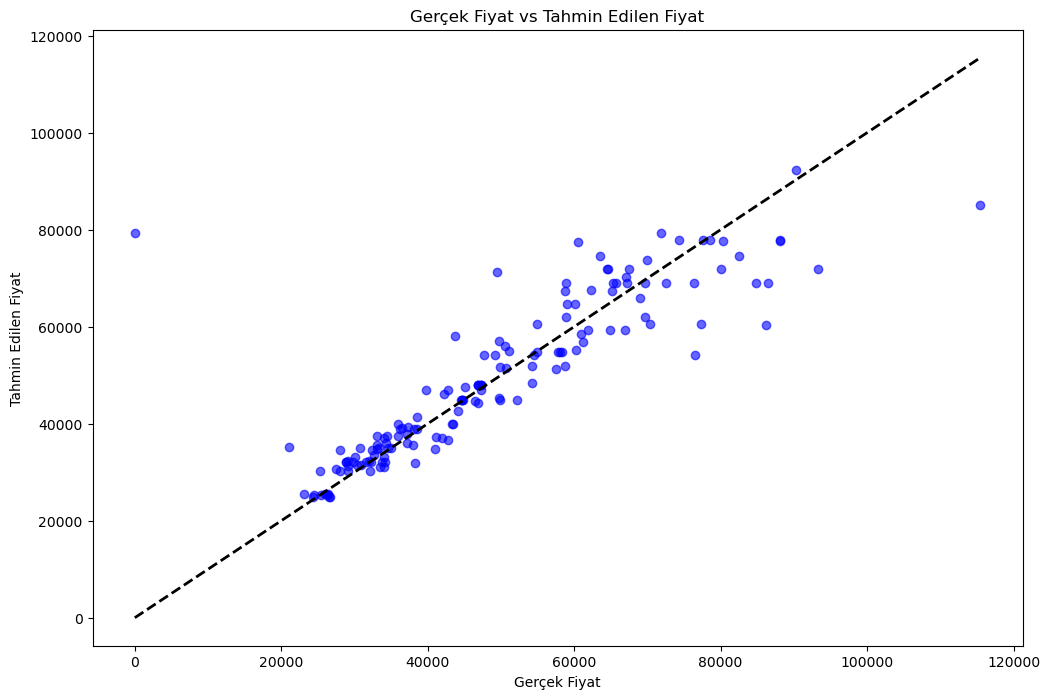

In [51]:
# Özelliklerin ve hedef değişkenin belirlenmesi
features = ['year', 'cylinders'] + categorical_columns
X = df[features]
y = df['price']

# Veri setini eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost modeli tanımlama
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Hiperparametreler için grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# En iyi modeli seçme ve değerlendirme
best_xgb_model = grid_search.best_estimator_
y_pred = best_xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best XGBoost Model R^2: {r2}")
print(f"Best XGBoost Model MSE: {mse}")

# Tahminleri görselleştirme
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Gerçek Fiyat")
plt.ylabel("Tahmin Edilen Fiyat")
plt.title("Gerçek Fiyat vs Tahmin Edilen Fiyat")
plt.show()
